
# 2장 자료의 정리

1. 변수와 자료
- 변수와 자료의 종류
    - 양적 변수 : 수치로 나타낼 수 있는 것들
        - 명목변수 : 특성을 분류하기 위한 숫자로 단순한 구분기호
        - 서열변수 : 측정 대상간의 순서를 매기기 위함 (서열, 석차)
        - 등간변수 : 측정 대상의 순서뿐만 순서 사이의 간격(온도, IQ)
        - 비율변수 : 측정자료 간 비율 계산이 가능한 변수 (연령, 무게)
        - 이외 분류
            - 이산적 변수 : 정숫값을 취할 수 있는 변수. 측정치 사이에 간격 有
            - 연속적 변수 : 모든 실숫값을 취할 수 있는 변수. 수치사이에 틈 X
    - 질적 변수 : 속성을 수치로 나타낼 수 없는 것들
        - 질적 자료를 숫자로 나타낼 수 있음 ex) 남자 : 0, 여자 : 1

2. 도수분포표
- 자료의 특성을 요약하고 정리하는 기술적 통계학에서 가장 기본적인 역할
- 질적 자료의 정리
    - 상대적 빈도 : 한 범주에 속하는 빈도 / 전체관찰수
- 양적 자료의 정리
    - 이산적 자료
        - 누적빈도 : 어떤 등급에 해당되는 빈도를 포함해서 그 이하 또는 그 이상에 있는 모든 빈도를 합한 것이다.
    - 연속적 자료
        - 등급의 구간 = 자료의 최대값 - 자료의 최수값 / 등급의 수

3. 도표에 의한 도수분포표
    - 질적 자료의 도표 : 막대 그래프
    - 양적 자료의 도표
        - 이산적 자료의 도표 : 막대 그래프
        - 연속적 자료의 도표 : 히스토그램, 꺽은 선 그림표


# 연습문제

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Plot 그릴 때 한국어 깨짐 방지
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rc('font', size=11)


- 중학생 40명의 키를 측정한 결과 도수분포표를 작성

In [14]:
student = [138,164,150,132,144,125,149,157,
            146,158,140,147,136,148,152,144,
            168,126,138,177,163,120,154,165,
            146,173,142,147,135,153,140,135,
            161,145,135,142,150,156,145,128]

level_num = (max(student) - min(student)) / 6
level_num = round(level_num)
max(student), min(student)

(177, 120)

In [64]:
st_table = pd.DataFrame(np.array(student).T, columns=['height'])

bins = list(range(120, 181, 10))
bins_label = [str(x)+"이상 "+str(x+10)+"미만" for x in bins]
st_table["level"] = pd.cut(st_table["height"], bins, right=False, labels=bins_label[:-1])
st_dosu = pd.DataFrame(st_table.groupby('level').count()).reset_index()
st_dosu

,level,height
0,120이상 130미만,4
1,130이상 140미만,7
2,140이상 150미만,14
3,150이상 160미만,8
4,160이상 170미만,5
5,170이상 180미만,2


In [65]:
st_dosu['ratio'] = st_dosu['height'] / st_dosu['height'].sum()
st_dosu['Cumulative %'] = np.cumsum(st_dosu['ratio'])
st_dosu


,level,height,ratio,Cumulative %
0,120이상 130미만,4,0.100,0.100
1,130이상 140미만,7,0.175,0.275
2,140이상 150미만,14,0.350,0.625
3,150이상 160미만,8,0.200,0.825
4,160이상 170미만,5,0.125,0.950
5,170이상 180미만,2,0.050,1.000


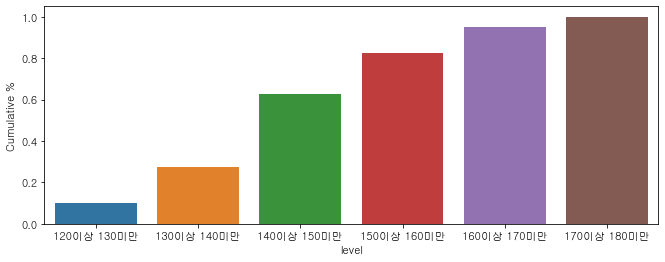

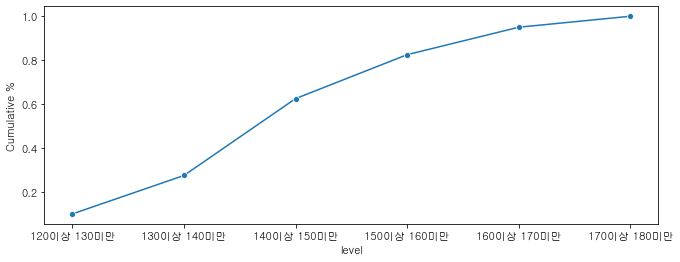

In [82]:
plt.figure(figsize=(11,4))
sns.barplot(x=st_dosu['level'], y=st_dosu['Cumulative %'])
plt.show()

plt.figure(figsize=(11,4))
sns.lineplot(x=st_dosu['level'], y=st_dosu['Cumulative %'],  marker='o')
plt.show()

- 금은방의 30개 금반지 순도 조사

In [117]:
ring = [99.55,99.43,99.6,99.38,99.57,99.80,99.61,99.94,99.79,
        99.51,99.29,99.57,99.83,99.80,99.53,99.89,99.84,99.64,
        99.68,99.40,99.49,99.54,99.99,99.70,99.68,99.59,99.73,
        99.65,99.71,99.64]

level_num = (max(ring) - min(ring)) / 5
level_num = 0.15
max(ring), min(ring)

(99.99, 99.29)

In [142]:
ring_table = pd.DataFrame(np.array(ring).T, columns=['sundo'])

bins = np.arange(99.25, 100.1, 0.15)
bins_label = [f'{x:.2f}'+"이상 "+f'{x+0.15:.2f}'+"미만" for x in bins]

ring_table["level"] = pd.cut(ring_table["sundo"], bins, right=False, labels=bins_label[:-1])
ring_dosu = pd.DataFrame(ring_table.groupby('level').count()).reset_index()
ring_dosu

,level,sundo
0,99.25이상 99.40미만,2
1,99.40이상 99.55미만,7
2,99.55이상 99.70미만,11
3,99.70이상 99.85미만,7
4,99.85이상 100.00미만,3


In [143]:
ring_dosu['ratio'] = ring_dosu['sundo'] / ring_dosu['sundo'].sum()
ring_dosu['Cumulative %'] = np.cumsum(ring_dosu['ratio'])
ring_dosu

,level,sundo,ratio,Cumulative %
0,99.25이상 99.40미만,2,0.066667,0.066667
1,99.40이상 99.55미만,7,0.233333,0.300000
2,99.55이상 99.70미만,11,0.366667,0.666667
3,99.70이상 99.85미만,7,0.233333,0.900000
4,99.85이상 100.00미만,3,0.100000,1.000000


- 어느 도시의 낮 최고기온

In [148]:
temper = [15.2,11,16.8,23.2,14.3,21.9,22.4,20.5,15,
        17,12.8,21,27.7,28,18.8,16.4,14.9,20,23.5,
        23.9,24,13.2,13.6,24.1,25.9,30.8,26.3,
        32.1,29.2,31.5,28.5]

level_num = (max(temper) - min(temper)) / 5
level_num = 5
max(temper), min(temper)

(32.1, 11)

In [158]:
temp_table = pd.DataFrame(np.array(temper).T, columns=['do'])

bins = np.arange(9.5, 34.6, 5)
bins_label = [f'{x:.2f}'+"이상 "+f'{x+5:.2f}'+"미만" for x in bins]

temp_table["level"] = pd.cut(temp_table["do"], bins, right=False, labels=bins_label[:-1])
temp_dosu = pd.DataFrame(temp_table.groupby('level').count()).reset_index()
temp_dosu

,level,do
0,9.50이상 14.50미만,5
1,14.50이상 19.50미만,7
2,19.50이상 24.50미만,10
3,24.50이상 29.50미만,6
4,29.50이상 34.50미만,3


In [159]:
temp_dosu['ratio'] = temp_dosu['do'] / temp_dosu['do'].sum()
temp_dosu['Cumulative %'] = np.cumsum(temp_dosu['ratio'])
temp_dosu

,level,do,ratio,Cumulative %
0,9.50이상 14.50미만,5,0.161290,0.161290
1,14.50이상 19.50미만,7,0.225806,0.387097
2,19.50이상 24.50미만,10,0.322581,0.709677
3,24.50이상 29.50미만,6,0.193548,0.903226
4,29.50이상 34.50미만,3,0.096774,1.000000


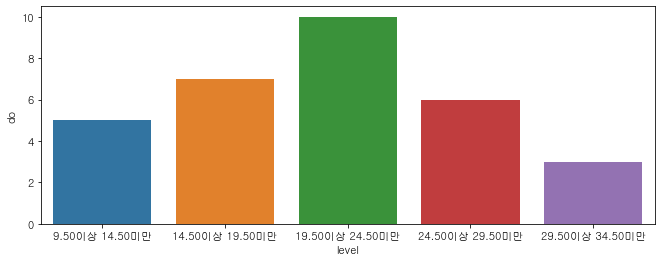

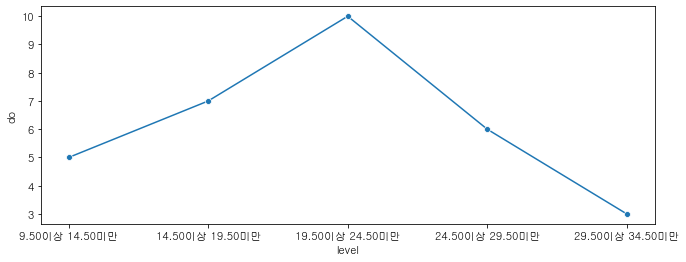

In [164]:
plt.figure(figsize=(11,4))
sns.barplot(x=temp_dosu['level'], y=temp_dosu['do'])
plt.show()

plt.figure(figsize=(11,4))
sns.lineplot(x=temp_dosu['level'], y=temp_dosu['do'],  marker='o')
plt.show()